# Logarithmic double ramification cycles, and piecewise polynomials

This code (written by David Holmes, Aaron Pixton and Johannes Schmitt) lies behind the calculations in [[HMPSS, Logarithmic double ramification cycles]](https://arxiv.org/abs/2207.06778). 

We define tropical moduli spaces of curves, and develop some general machinery for computations with subdivisions and piecewise polynomial functions (on those subdivisions). In the current version most tools are aimed fairly directly at the logDR problem; for example, in future it might be nice to add barycentric subdivision, or other subdivision constructions. 

The code computes the log DR cycle, which morally lives in the log Chow ring of the moduli stack of stable curves. What we actually do is to construct an explicit subdivision of the tropical moduli space/fan of $\overline{\mathcal M}_{g,n}$, and a DR cycle lying on that subdivision. We will explain more about how this works in a bit, but for now let's build the subdivision. 

## Stability conditions

Everything (the subdivision and the formula) depends on the choice of a stability condition. If you just ask the code to compute logDR, will produce a stability condition for you in the background, but you also have the option to choose your own stability condition, which is what we do here. 

A stability condition $\phi$ (in the sense of [[Kass-Pagani, The stability space of compactified universal Jacobians]](https://arxiv.org/abs/1707.02284)) is a map taking a pair $(\Gamma, v)$ of a stable graph $\Gamma$ and a vertex $v \in V(\Gamma)$ and associating to it a real number $\phi(\Gamma, v) \in \mathbb{R}$. It is required to satisfy
$$
\sum_{v \in V(\Gamma)} \phi(\Gamma, v) = 0
$$
and must be compatible under edge-contractions (see the above paper for details). From these properties, it follows that the set of all stability conditions (for fixed $g,n$) is a finite-dimensional vector space. A stability condition $\phi$ is uniquely determined by its values on the following two types of graphs:
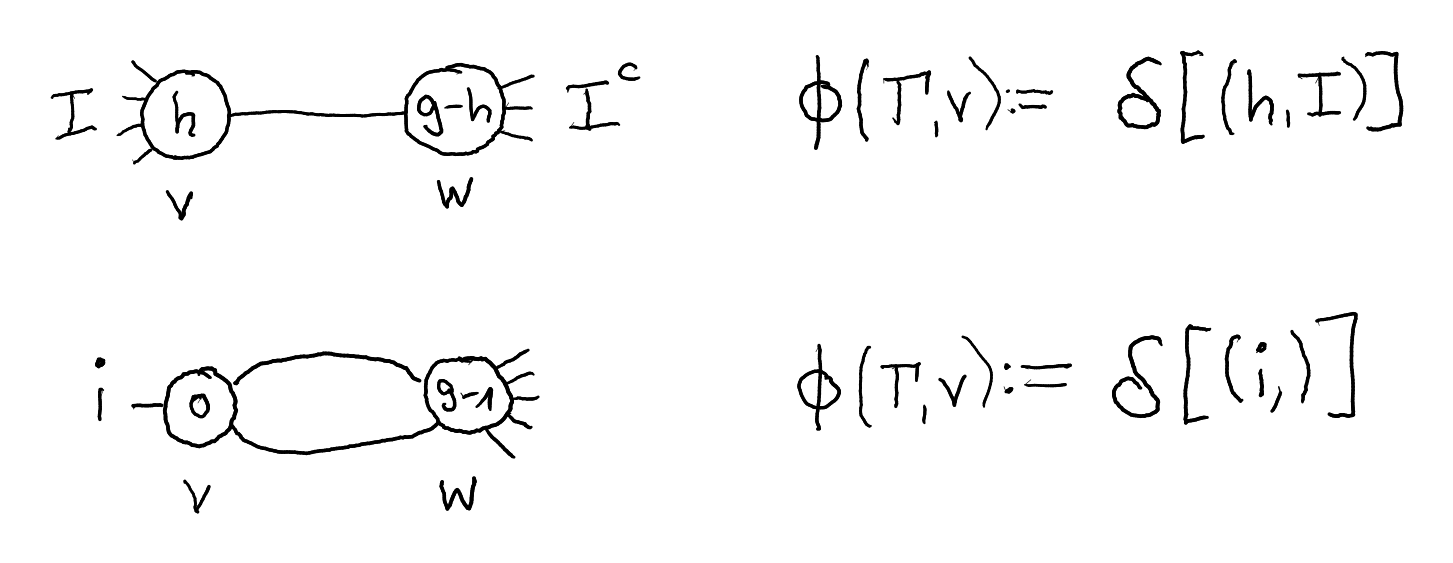

In our code, a stability condition can thus be specified by a dictionary ``delta``, with two types of keys 

* ``(h, I)``, with ``h`` the genus of the left vertex in the first graph above, ``I`` the tuple of markings on that vertex, and
* ``(i,)`` the marking on the left vertex in the second graph above.

For the first type of keys we take the convention that marking ``1`` should be contained in ``I`` (for $n>0$) and $h < g/2$ (for $n = 0$), respectively. 

We take Kass-Pagani's conventions for writing the stability conditions, but we work with line bundles on quasi-stable curves rather than with torsion free sheaves, so to impose the stability condition we use the approach described in [[HMPSS, Logarithmic double ramification cycles]](https://arxiv.org/abs/2207.06778).         

In [1]:
from admcycles.logtaut import *
# the following line makes renderings of stable graphs nicer
%display unicode_art

g, n = 1, 2
M = ModuliStableTropicalCurves(g,n)
V = GraphStabilitySpace(g,n)                         # QQ-vector space in which the stability condition lives
delta = {(0,(1,2)):2/23, (1,):1/10, (2,):-1/10}
phi = V(0, delta)                                    # stability condition, in the sense of Kass and Pagani
phi

A Kass-Pagani stability condition in genus 1 with 2 markings. 
 The degree dictionary is {(0, (1, 2)): 2/23, (1,): 1/10, (2,): -1/10}.

If you want to make up your own stability condition then Sage can help you out by producing a basis of the space of stability conditions: 

In [2]:
L = V.basis(); L

⎡ A Kass-Pagani stability condition in genus 1 with 2 markings.  
⎣  The degree dictionary is {(0, (1, 2)): 1, (1,): 0, (2,): 0}. ,

 A Kass-Pagani stability condition in genus 1 with 2 markings.  ⎤
  The degree dictionary is {(0, (1, 2)): 0, (1,): 1, (2,): -1}. ⎦

In [3]:
phiprime = 2/23 * L[0] + 1/10 * L[1]

In [4]:
phiprime == phi

True

You can use real or rational coefficients for the stability condition, but in the past we had some precision issues with the stability conditions, so rationals are safer. 

The code will work with any non-degenerate stability condition (and almost all stability conditions are non-degenerate, as the name suggests). However, if the stability condition  is not 'small' (formally: the zero multidegree is stable; informally, the coefficients are small) then what is computed is not actually logDR, but rather differs from it by some wall-crossing, which we do not understand very well yet. For now, let's check that our stability condition is actualy small: 

In [5]:
M.is_small(phi)

True

## The subdivision
The combination of the stabiity condition and the weighting vector determines a subdivision. 

In [6]:
A = (3, -3)
# compute subdivsion supporting logDR cycle in genus 1 for weighting vector (3,-3)
# with the stability condition phi we defined above 
# if you omit phi then the code will choose one for you
subdivision = logDR_subdivision(g,A,phi = phi)

# preparation to display the subdivision
graphlist = [a for a in subdivision.keys()]
fanlist = [subdivision[gamma] for gamma in graphlist]

We see the subdivision here via ``graphlist`` and ``fanlist``. The first of these is a list of the minimal strata/maximal graphs of the fan of $\overline{\mathcal M}_{g,n}$:

In [7]:
graphlist

⎡  ╭────╮       ╭────╮    ⎤
⎢  │    │╭╮     │╭────╮   ⎥
⎢  3    456     35   46   ⎥
⎢ ╭┴─╮ ╭┴┴┴╮   ╭┴┴╮ ╭┴┴╮  ⎥
⎢ │0 │ │0  │   │0 │ │0 │  ⎥
⎢ ╰┬┬╯ ╰───╯   ╰┬─╯ ╰┬─╯  ⎥
⎣  12        ,  1    2    ⎦

Fanlist is a list of the same length, and gives a subdivision of the fan of the corresponding graph. To see what is going on, let's draw some pictures. 

First we draw the fan for the first graph (which has only loops and separating edges); such a fan never needs to be subdivided to support logDR, and indeed the picture is boring: 

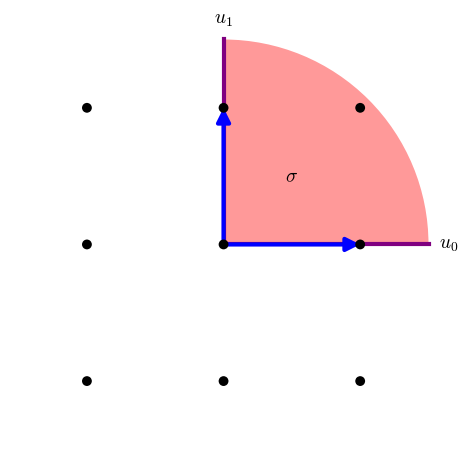

In [8]:
fanlist[0].plot()

The fan for the second graph really needs to be subdivided to support logDR, so we get a more interesting picture: 

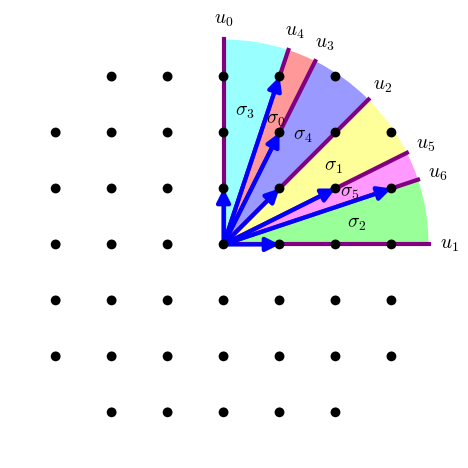

In [9]:
fanlist[1].plot()

## The logDR cycle
Finally, we compute the log DR cycle supported on this subdivision. You don't actually have to build the subdivision first; in fact, we won't use it below, and it can be recovered from the logDR output. We treated it first just for expository reasons. 

In [10]:
# compute logDR cycle in genus 1 for weighting vector (3,-3) 
# with the stability condition phi we defined above 
# if you omit phi then the code will choose one for you
tpart, pppart = logDR(g,(3,-3), phi = phi)

Here, ``tpart`` is the 'tautological' part, and ``pppart`` is the 'piecewise polynomial part'. 

The tautological part is rather simple in this example (and in general is not very complicated):

In [11]:
tpart # tautological part of logDR formula

Graph :
     
╭──╮ 
│1 │ 
╰┬┬╯ 
 12  
             
Polynomial : 1 + 9/2*ψ₁ + 9/2*ψ₂

Observe that this is a mixed-degree class. At present, the user has to extract the codimension g part 'by hand'. Probably this will be addressed in a future version, where we define an actual log Chow ring in admcycles. But there are a number of mathematical and implementation problems to be solved before we do this. 

The more interesting part is the piecewise polynomial (again, mixed degree):

In [12]:
pppart # piecewise polynomial part

Piecewise polynomial on Finite category with 2 objects. 
 ╭────╮  
 │    │╭╮
 3    456  
╭┴─╮ ╭┴┴┴╮ 
│0 │ │0  │ 
╰┬┬╯ ╰───╯ 
 12        
Piecewise polynomial on Rational polyhedral fan in 2-d lattice N
(N(0, 1), N(1, 0)) : -1/12*x1 + 1
 ╭────╮ 
 │╭────╮
 35   46  
╭┴┴╮ ╭┴┴╮ 
│0 │ │0 │ 
╰┬─╯ ╰┬─╯ 
 1    2   
Piecewise polynomial on Rational polyhedral fan in 2-d lattice N
(N(1, 2), N(1, 3)) : -37/12*x0 - 1/12*x1 + 1
(N(1, 1), N(2, 1)) : -13/12*x0 - 13/12*x1 + 1
(N(1, 0), N(3, 1)) : -1/12*x0 - 37/12*x1 + 1
(N(0, 1), N(1, 3)) : -37/12*x0 - 1/12*x1 + 1
(N(1, 1), N(1, 2)) : -13/12*x0 - 13/12*x1 + 1
(N(2, 1), N(3, 1)) : -1/12*x0 - 37/12*x1 + 1

Here we see the same list of maximal graphs as above (there are two of them). For the first graph there is no subdivision needed, so we are just writing down a polynomial function on the fan $\mathbb R_{\ge 0}^2$. This function is just $-x_1/12 + 1$, a rather simple polynomial. But which variable is $x_1$ - which edge does it correspond to? Well, this is a bit of a hack but the ordering of the variables is the same as the ordering of the edges ``[(3,4), (5,6)]`` of the graph, so $x_1$ corresponds to the second edge ``(3,4)``, i.e. to the loop.

For the second graph, we see a list of all the cones in the subdivision, and for each of those a polynomial function. We can check that their values really agree along rays; for example, at the ray through $(1,2)$ we have the functions $-37/12 x_0 - 1/12 x_1 + 1$ and $-13/12 x_0 - 13/12 x_1 + 1$, which both give the value $-27/12$ at the point $(1,2)$. 

A pretty LaTeX'd picture illustrating the above, after taking the codimension 1 part (this was created by hand, not automated):

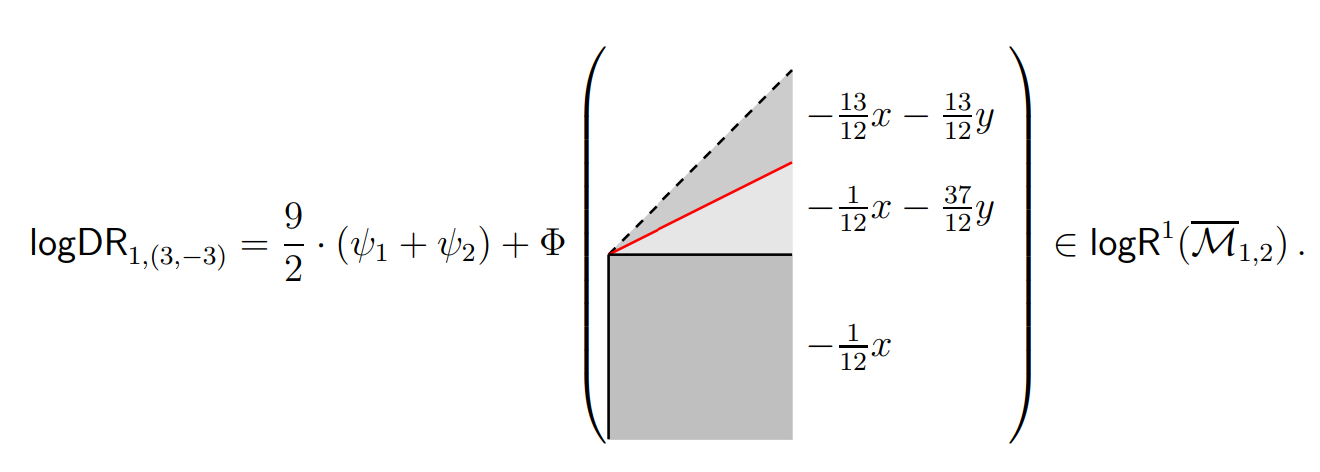

Let's check that our logDR pushes forward to usual DR: 

In [13]:
push = pppart.pushforward(M)       # push forward the piecewise polynomial part to the un-divided fan
tpush = M.tautological_class(push) # convert to a tautological class
pushedlogDR = tpart * tpush        # multiply the originainal tautological part with the pushed class,
                                   # getting a mixed degree class. 

Here ``pushedlogDR`` is a mixed-degree class, obtained by multiplying ``tpart`` with the pushforward of ``pppart``, with the latter converted to a tautological class. 
Note that pushing does not in general commute with multiplication, but when one of the classes comes from the base (as ``tpart`` does in this case) then it does by the projection formula, so this is OK. 

Let's check that the codimension 1 part of this is equal to the usual DR cycle: 

In [14]:
from admcycles import DR_cycle
print(DR_cycle(g,A).vector())
print(pushedlogDR.vector(1))

(0, 9/2, 9/2, 0, -1/24)
(0, 9/2, 9/2, 0, -1/24)


We can check the same for the codimension 2 parts of the formulae, though we need to re-do the logDR computations up to codimension ``d=2``. 

In [15]:
tpart, pppart = logDR(g,(3,-3), phi = phi, d = 2)

push = pppart.pushforward(M)        # push forward the piecewise polynomial part to the un-divided fan
tpush = M.tautological_class(push)  # convert to a tautological class
pushedlogDR = tpart * tpush         # multiply the originainal tautological part with the pushed class, 
                                    # getting a mixed degree class. 

print(DR_cycle(g,A,d=2).vector(2))
print(pushedlogDR.vector(2))

(0, 0, 0, 0, 81/8, 81/4, 81/8, 0, 0, 0, 1/240, -3/16, -3/16, 0, -79/60)
(0, 0, 0, 0, 81/8, 81/4, 81/8, 0, 0, 0, 1/240, -3/16, -3/16, 0, -79/60)


## Some other calculations and examples

A computation of
$$
\int_{\overline{\mathcal{M}}_{1,2}} \mathrm{logDR}_1(a,-a) \cdot \mathrm{logDR}_1(b,-b) = -\frac{1}{24} \mathrm{gcd}(a,b)^2\,.
$$

In [16]:
B = [6,-6]
C = [-3,3]
tpartB, pppartB = logDR(1,B,2,phi)
tpartC, pppartC = logDR(1,C,2,phi)
push = (pppartB*pppartC).pushforward(M)  # multiplying piecewise polynomials and pushing to Mbar
tpush = M.tautological_class(push)
t = tpartB * tpartC * tpush
t.evaluate()*(-24)  # gives gcd(a,b)^2

9

## Subdivision for a single graph
Suppose we just want to compute the subdivision for a single graph. We could extract this from the big subdivision, but it is kind of annoying if the graph is not maximal. However, we can access it directly (though here you do have to specify your own stability condition):

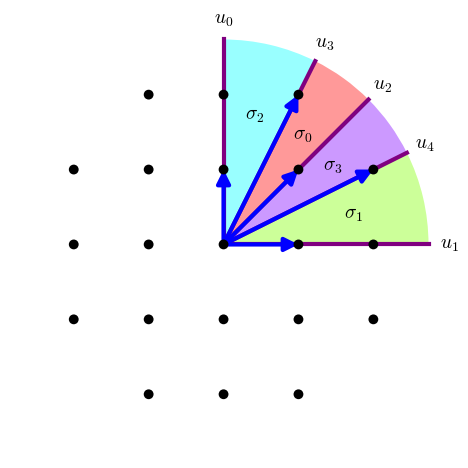

In [17]:
gamma = PicGraph([0,0], [[1,2,3],[4,5,6]], [(3,4), (2,5)],[3,-3]) # the [3,-3] is the multidegree coming from A
Fcom = gamma.complete_fan(phi)
Fcom.plot()

This also enables us to see things in higher genus, where the maximal fans of of dimension too high to draw. 

In [18]:
V2 = GraphStabilitySpace(2,2)
phi2 = V(0,{(0,(1,2)):1, (1,(1,2)):0.1, (1,(1,)):0.11, (1,):0.15, (2,):0.1}) 
PG = PicGraph([0,0],[[1,2,3],[4,5,6]],[(1,4),(2,5),(3,6)], [6,-6]) 
Fcom = PG.complete_fan(phi2)
Fcom.plot()

Graphics3d Object

## Canonical incomplete subdivision
For everything above we had to choose a stability condition. However, there is a canonical *incomplete* subdivision which supports logDR; it is just that so far we do not know how to use this to obtain a formula. But the incomplete subdivision is implemented. First a global version:

In [19]:
A = (3, -3)
subdivision = logDR_subdivision(g,A,complete = False) # note that no phi is needed; the construction does not depend on one!
graphlist = [a for a in subdivision.keys()]
fanlist = [subdivision[gamma] for gamma in graphlist]

The list of maximal graphs is of course the same as for the complete subdivision: 

In [20]:
graphlist

⎡  ╭────╮       ╭────╮    ⎤
⎢  │    │╭╮     │╭────╮   ⎥
⎢  3    456     35   46   ⎥
⎢ ╭┴─╮ ╭┴┴┴╮   ╭┴┴╮ ╭┴┴╮  ⎥
⎢ │0 │ │0  │   │0 │ │0 │  ⎥
⎢ ╰┬┬╯ ╰───╯   ╰┬─╯ ╰┬─╯  ⎥
⎣  12        ,  1    2    ⎦

but the fans are simpler:

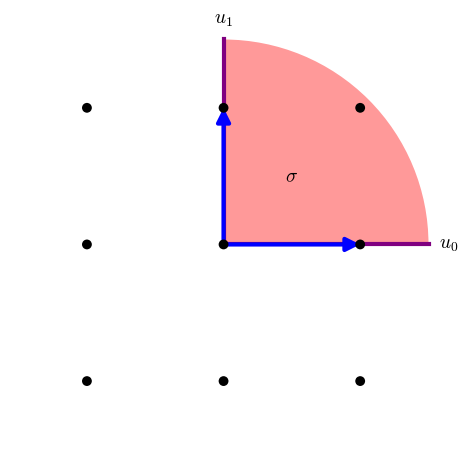

In [21]:
fanlist[0].plot()

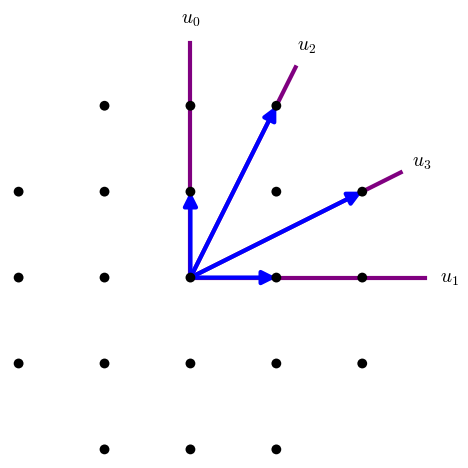

In [22]:
fanlist[1].plot()

Again, there is also a version which works for just one graph at a time. 

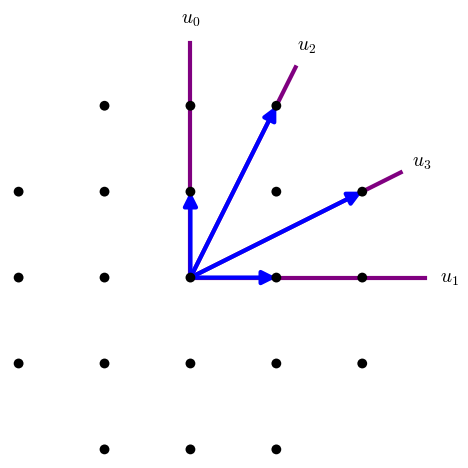

In [23]:
F = gamma.incomplete_fan(full = True) # if full = True is omitted then you only see interior cones. 
F.plot()

As before, we can use this to see things in higher genus with non-maximal graphs (where the dimensions for the maximal graphs would be too high to draw):

In [24]:
PG = PicGraph([0,0],[[1,2,3],[4,5,6]],[(1,4),(2,5),(3,6)], [6,-6]) 
F = PG.incomplete_fan(full = True)
F.plot()

Graphics3d Object